In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
austin_df = pd.read_csv('austin_311_service_requests.csv')
#austin_df.head()

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
austin_df = austin_df[["city", "incident_zip", "created_date", "owning_department", "complaint_description", "complaint_type"]]
#austin_df.head()

In [4]:
len(austin_df.index)

463540

In [5]:
austin_df.replace('', np.nan, inplace=True)
#austin_df.head()

In [6]:
#austin_df.count()

In [7]:
cleanaustin_df = austin_df.dropna(how="any")
#cleanaustin_df.count()

In [8]:
#cleanaustin_df.head()

In [9]:
#cleanaustin_df['city'].value_counts()

In [10]:
value_list = ['AUSTIN', 'Austin', 'austin']
austin311_df = cleanaustin_df[cleanaustin_df.city.isin(value_list)]

In [11]:
#austin311_df['city'].value_counts()

In [12]:
austin311_df.head()

,city,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [13]:
austin311_df['owning_department'].value_counts()


Animal Services Office                          87678
Austin Code Department                          79239
Transportation                                  76147
Austin Resource Recovery                        64405
Public Works                                    43630
Austin Energy Department                        18497
Parks & Recreation Department                   16361
Health & Human Services                         13911
Economic Development Department                 12277
Austin Water Utility                            11566
Watershed Protection                             9252
Public Health                                    3886
Austin Water                                      827
Neighborhood Housing & Community Development      122
Austin Fire Department                             66
Neighborhood Housing & Community                   51
Office of Emergency Management                      1
Name: owning_department, dtype: int64

In [14]:
animal_services = austin311_df[austin311_df['owning_department'].str.contains('Animal Services Office')]
animal_services.head()

,city,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
4,AUSTIN,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [15]:
animal_services['complaint_type'].value_counts()

ACLONAG     27958
ACINFORM    18634
COAACINJ    13808
ACPROPER     5170
WILDEXPO     4767
ACBITE2      4316
COAFAR       3505
ACFOUND      2897
ACLOANIM     1761
COAACDD      1754
COAACBAT     1000
ACVEHICL      790
ACCOYTE       771
ACTRAP        396
HHSANRSS       79
COAACDA        70
ACDEADBI        1
COYOCOMP        1
Name: complaint_type, dtype: int64

In [16]:
animal_services['complaint_description'].value_counts()

Loose Dog                              27958
Animal Control - Assistance Request    18634
Injured / Sick Animal                  13808
Animal - Proper Care                    5170
Wildlife Exposure                       4767
Animal Bite                             4316
Found Animal Report - Keep              3505
Found Animal - Pick Up                  2897
Dangerous/Vicious Dog Investigation     1754
Loose Animal Not Dog                    1415
Bat Complaint                           1000
Animal In Vehicle                        790
Coyote Complaints                        768
Animal Trapped in Storm Drain            396
Loose Animal (not dog)                   346
Animal Roadside Sales                     79
Dangerous Animal - Except Dogs            70
zCoyote Complaints                         3
zz - Coyote Compliants                     1
Dead Bird                                  1
Name: complaint_description, dtype: int64

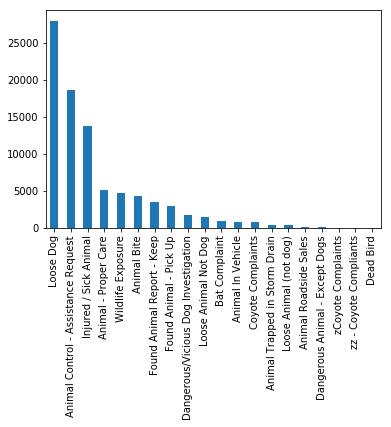

In [32]:
pd.value_counts(animal_services['complaint_description']).plot.bar()
plt.show()

In [44]:
animal_services['incident_zip'].value_counts()

78744.0    7119
78745.0    6478
78741.0    4781
78753.0    4717
78758.0    4687
78704.0    4469
78702.0    4124
78723.0    3859
78748.0    3791
78724.0    3181
78721.0    2902
78754.0    2287
78749.0    2185
78759.0    2123
78752.0    2015
78757.0    1793
78727.0    1655
78703.0    1649
78617.0    1635
78747.0    1629
78701.0    1549
78731.0    1542
78750.0    1520
78746.0    1443
78751.0    1204
78729.0    1130
78735.0    1003
78705.0     959
78728.0     953
78756.0     942
78660.0     916
78725.0     793
78734.0     758
78722.0     737
78739.0     679
78717.0     649
78726.0     585
78732.0     513
78736.0     502
78733.0     408
78730.0     312
78719.0     302
78742.0     232
78653.0     221
78652.0     207
78737.0     171
78738.0     160
78712.0      75
78613.0      75
78641.0      27
78610.0      27
78681.0       2
78669.0       1
78621.0       1
78620.0       1
Name: incident_zip, dtype: int64

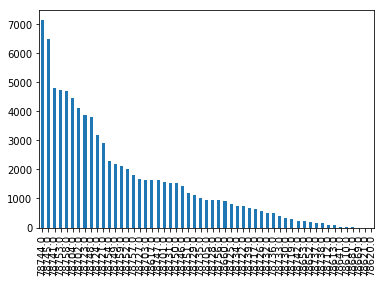

In [37]:
pd.value_counts(animal_services['incident_zip']).plot.bar()
plt.show()

In [17]:
code_department = austin311_df[austin311_df['owning_department'].str.contains('Austin Code Department')]
code_department.head()

,city,incident_zip,created_date,owning_department,complaint_description,complaint_type
3,AUSTIN,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
6,AUSTIN,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
9,AUSTIN,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
13,AUSTIN,78701.0,2016-08-17 11:46:27,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
18,AUSTIN,78705.0,2016-09-15 13:52:56,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [18]:
code_department['complaint_type'].value_counts()

CODECOMP    73812
CCSIGBIL     2422
SHTERECS     1989
COCSTRSA      809
RESTBREA      205
COCOWOAP        2
Name: complaint_type, dtype: int64

In [19]:
code_department['complaint_description'].value_counts()

Austin Code - Request Code Officer                   73812
Austin Code - Signs/Billboards                        2421
Austin Code - Short Term Rental Complaint SR          1711
Austin Code - Short Term Rental (STR) Appointment      809
Short Term Rental Complaint SR                         278
Austin Code - Construction Ordinance SR                168
Austin Code - Construction Rest Break Complaint         37
Austin Code - Woodridge Apt                              2
Code Compliance - Signs/Billboards                       1
Name: complaint_description, dtype: int64

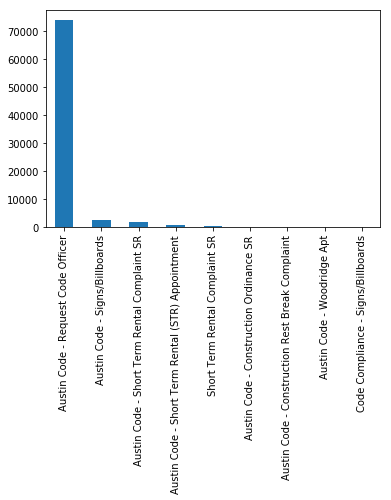

In [38]:
pd.value_counts(code_department['complaint_description']).plot.bar()
plt.show()

In [43]:
code_department['incident_zip'].value_counts()

78745.0    6878
78723.0    5981
78758.0    5658
78753.0    5305
78702.0    5224
78704.0    5160
78741.0    4858
78744.0    4177
78757.0    2832
78748.0    2690
78724.0    2411
78721.0    2354
78759.0    2103
78703.0    2096
78751.0    2005
78752.0    1903
78731.0    1895
78705.0    1854
78749.0    1762
78727.0    1692
78701.0    1325
78750.0    1291
78756.0    1019
78722.0     841
78729.0     759
78754.0     759
78746.0     617
78747.0     560
78735.0     454
78617.0     380
78736.0     371
78732.0     323
78730.0     312
78725.0     257
78726.0     221
78717.0     192
78742.0     182
78739.0     175
78734.0      80
78660.0      68
78733.0      47
78653.0      46
78719.0      45
78728.0      36
78613.0      19
78652.0      13
78737.0       6
78712.0       2
78610.0       1
Name: incident_zip, dtype: int64

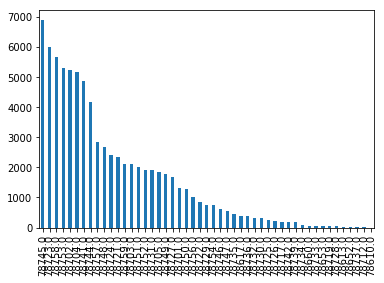

In [39]:
pd.value_counts(code_department['incident_zip']).plot.bar()
plt.show()

In [20]:
transportation = austin311_df[austin311_df['owning_department'].str.contains('Transportation')]
transportation.head()

,city,incident_zip,created_date,owning_department,complaint_description,complaint_type
14,AUSTIN,78702.0,2014-05-15 10:13:41,Transportation,Sign - Traffic Sign Emergency,SIGNTRAF
22,AUSTIN,78742.0,2014-12-26 10:43:49,Transportation,Traffic Signal - Maintenance,TRASIGMA
30,AUSTIN,78701.0,2016-03-15 18:08:07,Transportation,Traffic Signal - Maintenance,TRASIGMA
33,AUSTIN,78703.0,2016-07-17 19:04:00,Transportation,Traffic Signal - Maintenance,TRASIGMA
40,AUSTIN,78751.0,2014-12-10 13:09:40,Transportation,Traffic Signal - Dig Tess Request,TRAFFI10


In [21]:
transportation['complaint_type'].value_counts()

TRASIGMA    27800
TRAFFI10     8923
SIGNNEWT     4369
SIGNTRA1     4285
SIGNTRAF     3613
PARMACIS     3107
CONCERNS     2605
OBSINTTR     2334
TRASIGNE     2250
SIGNSTRE     2141
CONSTRUC     1841
ROADMARK     1838
SIGNPARK     1522
TRANSPOR     1426
SCHOOLZ2     1297
TRAFFICC     1295
ROADMAR2     1097
PWBICYCL     1008
EMROCLRE      917
PWSIDEWL      791
PARKINGT      404
SPEEDLIM      324
SIGNSCHO      279
PARKINGV      232
SCHOOLIS      172
CONSTRU1      126
VENDORPE       58
PARKINGP       42
REPAPEEN       16
VALETPER       15
TRAFFICE        9
FILMINGP        4
UTILITYC        4
NEWSPAPE        3
Name: complaint_type, dtype: int64

In [22]:
transportation['complaint_description'].value_counts()

Traffic Signal - Maintenance                27800
Traffic Signal - Dig Tess Request            8923
Sign - New                                   4369
Sign - Traffic Sign Maintenance              4285
Sign - Traffic Sign Emergency                3613
Parking Machine Issue                        3107
Concerns in the ROW                          2605
View Obstruction at Intersection             2334
Traffic Signal - New/Change                  2250
Sign - Street Name                           2141
Road Markings/Striping - Maintenance         1838
Sign - Parking Sign Maintenance              1522
Traffic Engineering - General                1426
School Zone Flasher - Timing/Maintenance     1297
Traffic Calming                              1295
Road Markings/Striping - New                 1097
Bicycle Issues                               1008
Construction Items- ROW                       953
Lane/Road Closure Notification                916
Construction items in ROW                     888


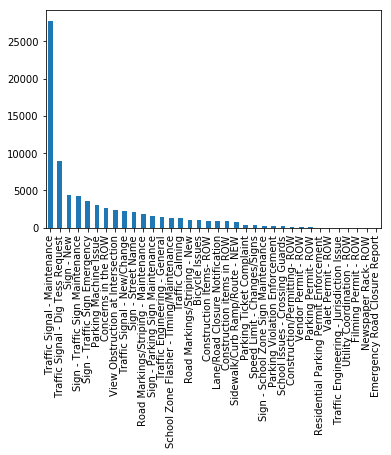

In [40]:
pd.value_counts(transportation['complaint_description']).plot.bar()
plt.show()

In [42]:
transportation['incident_zip'].value_counts()

78701.0    7265
78704.0    5894
78745.0    4193
78702.0    3734
78758.0    3534
78703.0    3472
78723.0    3112
78759.0    3024
78749.0    2964
78731.0    2884
78757.0    2790
78705.0    2762
78753.0    2752
78741.0    2687
78744.0    2687
78751.0    2416
78748.0    1848
78746.0    1546
78752.0    1374
78756.0    1337
78729.0    1276
78727.0    1237
78750.0    1168
78722.0    1125
78721.0    1107
78724.0    1078
78735.0     959
78717.0     763
78754.0     749
78730.0     549
78739.0     521
78726.0     514
78617.0     354
78747.0     333
78660.0     290
78712.0     257
78728.0     254
78725.0     209
78736.0     202
78742.0     193
78719.0     179
78613.0     159
78732.0     154
78653.0     128
78652.0      41
78737.0      20
78733.0      19
78734.0      16
78738.0       9
78681.0       5
78610.0       4
Name: incident_zip, dtype: int64

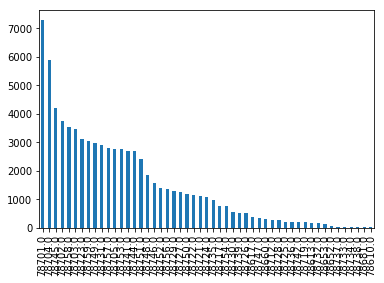

In [41]:
pd.value_counts(transportation['incident_zip']).plot.bar()
plt.show()

In [23]:
resource_recovery = austin311_df[austin311_df['owning_department'].str.contains('Austin Resource Recovery')]
resource_recovery.head()

,city,incident_zip,created_date,owning_department,complaint_description,complaint_type
47,AUSTIN,78721.0,2016-03-13 13:26:48,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC
62,AUSTIN,78731.0,2017-06-20 09:13:47,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA
64,AUSTIN,78758.0,2017-06-15 18:32:01,Austin Resource Recovery,ARR Street Sweeping,SWSSTSWE
68,AUSTIN,78757.0,2017-06-29 22:23:20,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC
83,AUSTIN,78727.0,2015-06-06 13:41:42,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA


In [24]:
resource_recovery['complaint_type'].value_counts()

SWSRECYC    21002
SWSDEADA    20110
SWSYARDT    13373
ARRBRUBU     5300
SWSSTSWE     2498
CODECOMP     1720
ARUNRECB      107
CCSIGBIL       97
COCSTRSA       92
ORSICABA       64
SWSDUMPS       41
RESTBREA        1
Name: complaint_type, dtype: int64

In [25]:
resource_recovery['complaint_description'].value_counts()

ARR Missed Recycling                                 21002
ARR Dead Animal Collection                           20110
ARR Missed Yard Trimmings /Organics                  13190
ARR Brush and Bulk                                    5300
ARR Street Sweeping                                   2498
Austin Code - Request Code Officer                    1720
ARR Missed Yard Trimmings/Compost                      183
Ordinance Universal Recycling                          107
Austin Code - Signs/Billboards                          97
Austin Code - Short Term Rental (STR) Appointment       92
Ordinance Single-Use Carryout Bags                      64
ARR Dumpster                                            41
Austin Code - Construction Ordinance SR                  1
Name: complaint_description, dtype: int64

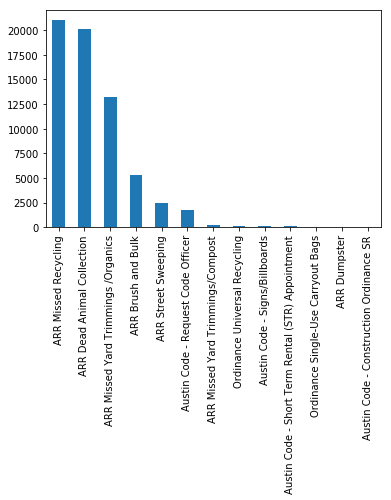

In [45]:
pd.value_counts(resource_recovery['complaint_description']).plot.bar()
plt.show()

In [49]:
resource_recovery['incident_zip'].value_counts()

78745.0    5388
78704.0    4066
78702.0    4029
78759.0    3733
78748.0    3495
78731.0    3328
78744.0    3094
78723.0    2899
78758.0    2705
78749.0    2605
78703.0    2547
78753.0    2406
78757.0    2214
78741.0    1833
78751.0    1734
78727.0    1515
78750.0    1489
78739.0    1475
78721.0    1430
78705.0    1268
78724.0    1196
78752.0    1088
78746.0    1026
78747.0     906
78717.0     842
78729.0     833
78722.0     828
78756.0     771
78735.0     747
78754.0     726
78701.0     523
78726.0     463
78736.0     387
78617.0     284
78725.0     143
78730.0      85
78660.0      78
78742.0      62
78653.0      50
78652.0      23
78613.0      22
78728.0      19
78737.0      16
78719.0      14
78712.0       6
78733.0       5
78732.0       4
78734.0       3
78738.0       2
Name: incident_zip, dtype: int64

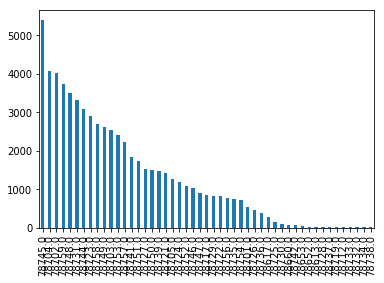

In [46]:
pd.value_counts(resource_recovery['incident_zip']).plot.bar()
plt.show()

In [26]:
public_works = austin311_df[austin311_df['owning_department'].str.contains('Public Works')]
public_works.head()

,city,incident_zip,created_date,owning_department,complaint_description,complaint_type
12,AUSTIN,78702.0,2016-03-09 14:46:45,Public Works,Pavement Failure,SBPAVEFA
32,AUSTIN,78717.0,2017-01-20 15:41:40,Public Works,Debris in Street,SBDEBROW
41,AUSTIN,78704.0,2015-06-03 14:08:48,Public Works,Obstruction in ROW,OBSTMIDB
42,AUSTIN,78705.0,2016-10-05 11:53:42,Public Works,Curb/Gutter Repair,SBCURBGU
48,AUSTIN,78753.0,2014-02-06 15:53:16,Public Works,Pothole Repair,SBPOTREP


In [27]:
public_works['complaint_type'].value_counts()

SBPOTREP    9296
SBDEBROW    6138
OBSTMIDB    5514
PRTRROWM    5010
PRTRROWE    4340
SBSIDERE    3734
SBPAVEFA    3283
MOWINGME    1707
SBALLEY     1575
SBCURBGU     748
SBSTRES      717
SCHOOLZ1     375
SBGRDREP     316
SBBARREQ     216
PWSIDEWL     189
SBBRIDRE     137
SBROADSP     116
PWBICYCL      97
SBRSR         54
SBGRDRN       34
SCHOOLIS      26
SBMOFEN        8
Name: complaint_type, dtype: int64

In [28]:
public_works['complaint_description'].value_counts()

Pothole Repair                        9296
Debris in Street                      6138
Obstruction in ROW                    5514
Tree Issue ROW/Maintenance (PW)       4981
Tree Issue ROW/Emergency (PW)         4316
Sidewalk Repair                       3734
Pavement Failure                      3283
Mowing Medians                        1707
Alley & Unpaved Street Maintenance    1575
Curb/Gutter Repair                     748
Street Resurfacing Inquiry             717
School Zone - New/Review/Changes       375
Guardrail Repair                       316
Barricade Request                      216
Sidewalk/Curb Ramp/Route - NEW         189
Bridge Repair                          137
Roadway Spillage                       116
Bicycle Issues                          97
Road Sanding Request                    54
Guardrail - New                         34
Tree Issue ROW/Maintenance (PARD)       29
School Issues - Crossing Guards         26
Tree Issue ROW/Emergency (PARD)         24
Fence Repai

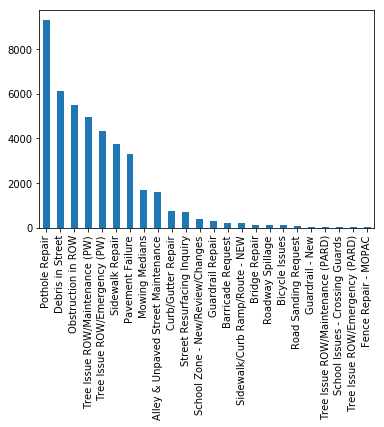

In [47]:
pd.value_counts(public_works['complaint_description']).plot.bar()
plt.show()

In [51]:
public_works['incident_zip'].value_counts()

78745.0    3643
78704.0    3121
78702.0    2477
78703.0    2472
78744.0    2054
78705.0    2008
78751.0    1912
78701.0    1870
78758.0    1838
78723.0    1793
78731.0    1713
78757.0    1633
78753.0    1585
78759.0    1505
78741.0    1416
78749.0    1366
78748.0    1343
78756.0    1049
78727.0     863
78750.0     826
78721.0     758
78746.0     726
78722.0     717
78752.0     652
78735.0     645
78754.0     575
78724.0     552
78729.0     455
78747.0     344
78739.0     336
78717.0     208
78730.0     188
78617.0     155
78725.0     128
78726.0     124
78736.0     117
78660.0     111
78742.0      87
78653.0      62
78728.0      51
78712.0      42
78719.0      25
78613.0      24
78733.0      22
78732.0      12
78737.0       9
78734.0       7
78652.0       6
78681.0       2
78738.0       1
78641.0       1
78610.0       1
Name: incident_zip, dtype: int64

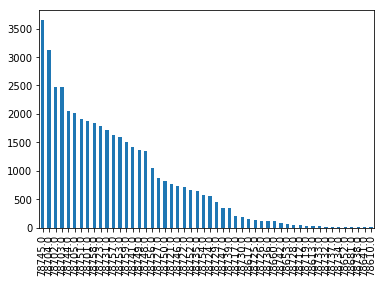

In [50]:
pd.value_counts(public_works['incident_zip']).plot.bar()
plt.show()